<b/>Data Science Project

<b/>Make necessary imports:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<b/>Read all CSV files into pandas data frames:

In [2]:
spreads = pd.read_csv("spreads.csv") #Kaggle plus other edits

passing_df = pd.read_csv("nfl_passing_stats.csv") #Web Scraped
clean_passing_df = passing_df[(passing_df['Yds'] >= 500) & (passing_df['Att'] >= 100) & (passing_df['Team'] != '2TM') & (passing_df['Pos'] == 'QB') & (passing_df['Player'] != 'League Average')]

rushing_df = pd.read_csv("nfl_rushing_stats.csv") #Web Scraped
clean_rushing_df = rushing_df[(rushing_df['Yds'] > 100) & (rushing_df['Att'] > 50) & (rushing_df['Pos'] == 'RB') & (rushing_df['Team'] != '2TM')]

receiving_df = pd.read_csv("nfl_receiving_stats.csv") #Web Scraped
clean_receiving_df = receiving_df[(receiving_df['Yds'] >= 100) & (receiving_df['Tgt'] >= 10) & ((receiving_df['Pos'] == 'WR') 
| (receiving_df['Pos'] == 'TE') | (receiving_df['Pos'] == 'RB')) & (receiving_df['Team'] != '2TM') 
& (receiving_df['Player'] != 'League Average') & (receiving_df['Team'] != '3TM')]

defense_df = pd.read_csv("nfl_defense_stats.csv") #Web Scraped
clean_defense_df = defense_df[(defense_df['G'] < 1) | (defense_df['Team'] != '2TM')]

standings_df = pd.read_csv("nfl_standings_cleaned.csv") #Web Scraped

<b/>Avg Season Wins vs. times covering the spread:

In [3]:
wins_df = standings_df.groupby(['Team', 'Season'])['W'].sum().reset_index()

covers_df = spreads.groupby(['Team', 'Season'])['cover'].sum().reset_index()
covers_df.rename(columns={'cover': 'Covers'}, inplace=True)

comp= pd.merge(wins_df, covers_df, on=['Team', 'Season'], how='inner')
comp.to_csv('g.csv')

bins = [0, 3, 7, 9, 11, 13, 17]
bin_labels = ['0-3', '3-7', '7-9', '9-11', '11-13', '13-17']

comp['WinsBin'] = pd.cut(comp['W'], bins=bins, labels=bin_labels, right=True)

bin_stats = comp.groupby('WinsBin', observed=False).agg({
    'Covers': 'mean',
    'Team': 'count'
}).reset_index().rename(columns={
    'Covers': 'AvgCovers',
    'Team': 'TeamCount'
})


<b/> Graph:

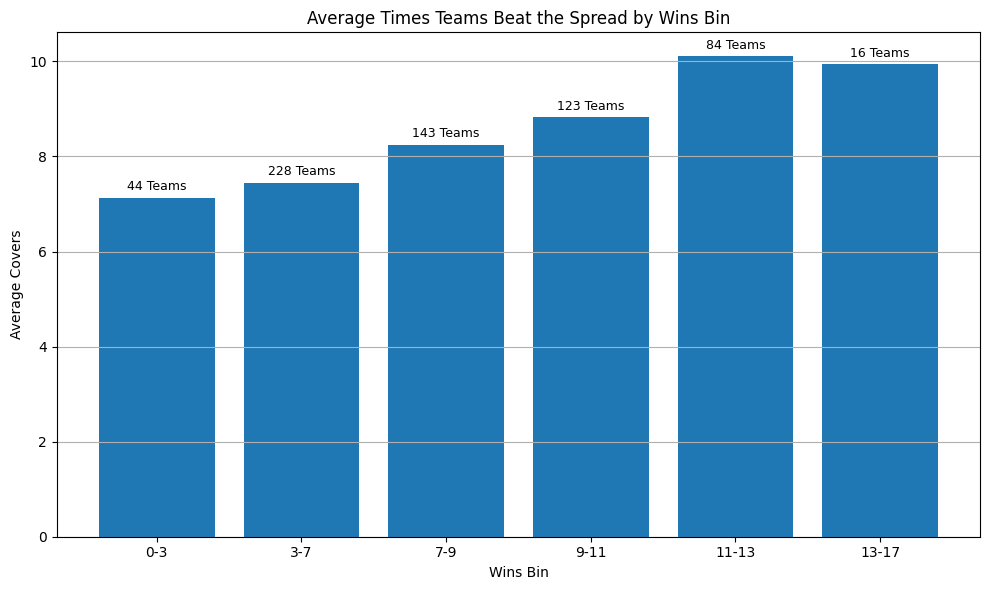

In [4]:
plt.figure(figsize=(10, 6))
bars = plt.bar(bin_stats['WinsBin'], bin_stats['AvgCovers'])

plt.title('Average Times Teams Beat the Spread by Wins Bin')
plt.xlabel('Wins Bin')
plt.ylabel('Average Covers')
plt.grid(axis='y')
plt.tight_layout()

# Add text on top of bars
for bar, count in zip(bars, bin_stats['TeamCount']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, f'{count} Teams',
             ha='center', va='bottom', fontsize=9)

plt.show()

<b/>QB Passing Yards vs. times covering spread:

In [5]:
top_qb_players = clean_passing_df.loc[
    clean_passing_df.groupby(['Season', 'Team'])['Yds'].idxmax(), 
    ['Season', 'Team', 'Player', 'Yds']
].rename(columns={'Player': 'QB_Player', 'Yds': 'QB_Yds'})

bins = [0, 2000, 2500, 3000, 3500, 4000, 4500, float('inf')]
bin_labels = ['< 2000', '2000-2500', '2500-3000', '3000-3500', '3500-4000', '4000-4500', '> 4500']

qb_stats = top_qb_players.groupby(['QB_Player', 'Team', 'Season'])['QB_Yds'].sum().reset_index()
qb_stats.to_csv('output.csv', index=False)
merged_data = pd.merge(
    qb_stats,
    spreads[['Team', 'Season', 'cover']],
    on=['Team', 'Season'],
    how='inner'
)

merged_data['YardsBin'] = pd.cut(merged_data['QB_Yds'], bins=bins, labels=bin_labels, right=False)

bin_stats = merged_data.groupby('YardsBin', observed=False).agg({'cover': 'mean','QB_Player': 'count'  }).reset_index()

bin_stats.rename(columns={'cover': 'AvgCovers', 'QB_Player': 'QBCount'}, inplace=True)

<b/>Graph Passing Data:

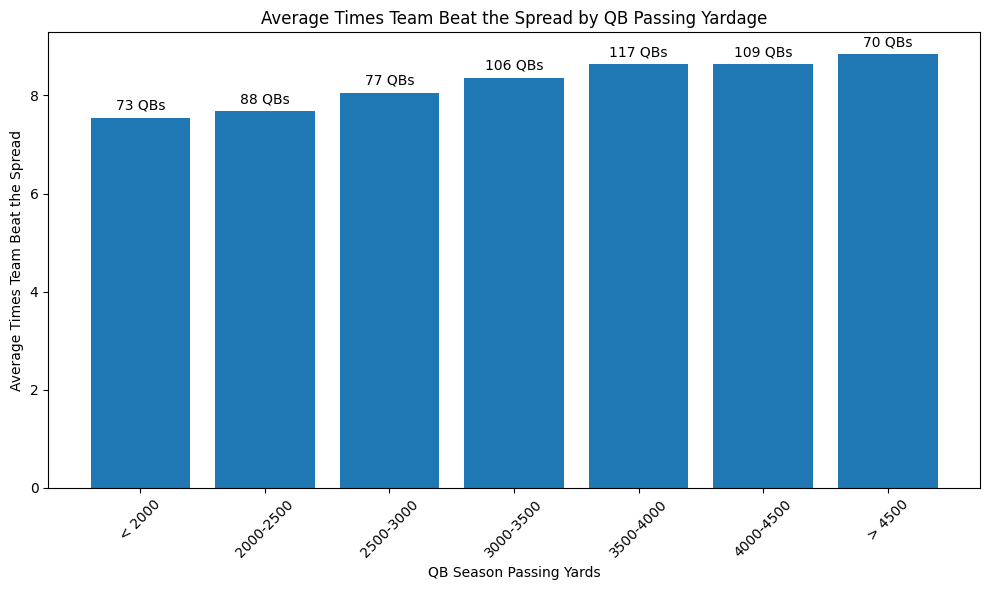

In [6]:
plt.figure(figsize=(10,6))
bars = plt.bar(bin_stats['YardsBin'], bin_stats['AvgCovers'])

plt.title("Average Times Team Beat the Spread by QB Passing Yardage")
plt.xlabel("QB Season Passing Yards")
plt.ylabel("Average Times Team Beat the Spread")
plt.xticks(rotation=45)
plt.tight_layout()

for bar, count in zip(bars, bin_stats['QBCount']):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,  # position above bar
        f'{int(count)} QBs',
        ha='center',
        va='bottom',
        fontsize=10
    )
    
plt.show()

<b/>RB Rushing Yards vs. times covering spread:

In [7]:
top_rushing_players = clean_rushing_df.loc[
    clean_rushing_df.groupby(['Season', 'Team'])['Yds'].idxmax(), 
    ['Season', 'Team', 'Player', 'Yds']
].rename(columns={'Player': 'RB_Player', 'Yds': 'RB_Yds'})

bins = [0, 500, 750, 1000, 1250, 1500, float('inf')]
bin_labels = ['< 500', '500-750', '750-1000', '1000-1250', '1250-1500','> 1500']

rb_stats = top_rushing_players.groupby(['RB_Player', 'Team', 'Season'])['RB_Yds'].sum().reset_index()
rb_stats.to_csv('output.csv', index=False)
merged_data = pd.merge(
    rb_stats,
    spreads[['Team', 'Season', 'cover']],
    on=['Team', 'Season'],
    how='inner'
)

merged_data['YardsBin'] = pd.cut(merged_data['RB_Yds'], bins=bins, labels=bin_labels, right=False)

bin_stats = merged_data.groupby('YardsBin', observed=False).agg({'cover': 'mean','RB_Player': 'count'  }).reset_index()

bin_stats.rename(columns={'cover': 'AvgCovers', 'RB_Player': 'RBCount'}, inplace=True)

<b/>Graph

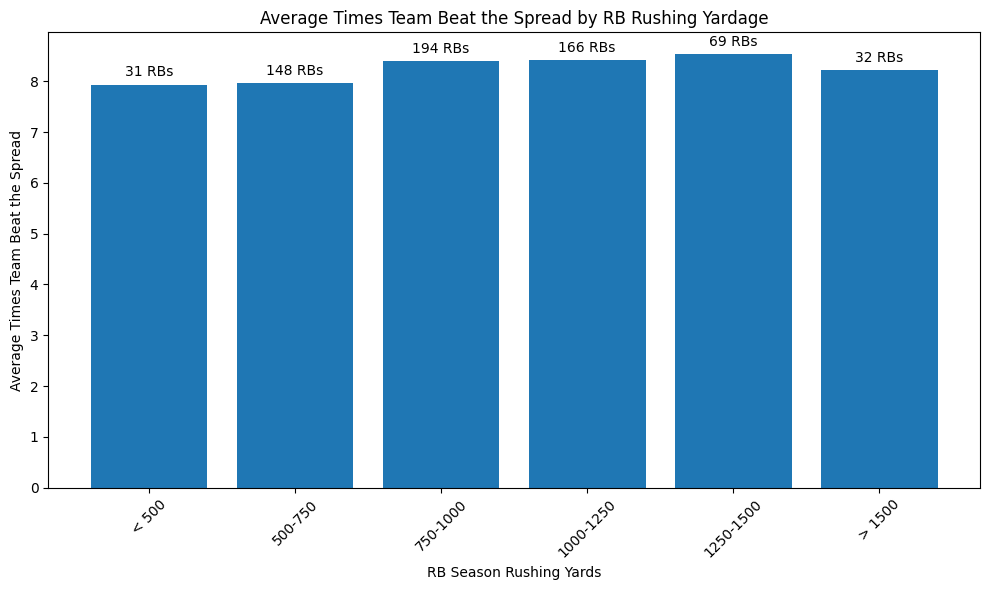

In [8]:
plt.figure(figsize=(10,6))
bars = plt.bar(bin_stats['YardsBin'], bin_stats['AvgCovers'])

plt.title("Average Times Team Beat the Spread by RB Rushing Yardage")
plt.xlabel("RB Season Rushing Yards")
plt.ylabel("Average Times Team Beat the Spread")
plt.xticks(rotation=45)
plt.tight_layout()
for bar, count in zip(bars, bin_stats['RBCount']):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,  # position above bar
        f'{int(count)} RBs',
        ha='center',
        va='bottom',
        fontsize=10
    )
plt.show()

<b>Recieving:<b>

In [9]:
top_receiving_players = clean_receiving_df.loc[
    clean_receiving_df.groupby(['Season', 'Team'])['Yds'].idxmax(), 
    ['Season', 'Team', 'Player', 'Yds']
].rename(columns={'Player': 'WR_Player', 'Yds': 'WR_Yds'})

bins = [0, 600, 800, 1000, 1200, 1400, 1600, float('inf')]
bin_labels = ['< 600', '600-800', '800-1000', '1000-1200', '1200-1400','1400-1600', '> 1600']

wr_stats = top_receiving_players.groupby(['WR_Player', 'Team', 'Season'])['WR_Yds'].sum().reset_index()
merged_data = pd.merge(
    wr_stats,
    spreads[['Team', 'Season', 'cover']],
    on=['Team', 'Season'],
    how='inner'
)

merged_data['YardsBin'] = pd.cut(merged_data['WR_Yds'], bins=bins, labels=bin_labels, right=False)

bin_stats = merged_data.groupby('YardsBin', observed=False).agg({'cover': 'mean','WR_Player': 'count'  }).reset_index()

bin_stats.rename(columns={'cover': 'AvgCovers', 'WR_Player': 'WRCount'}, inplace=True)

<b/>Graph:

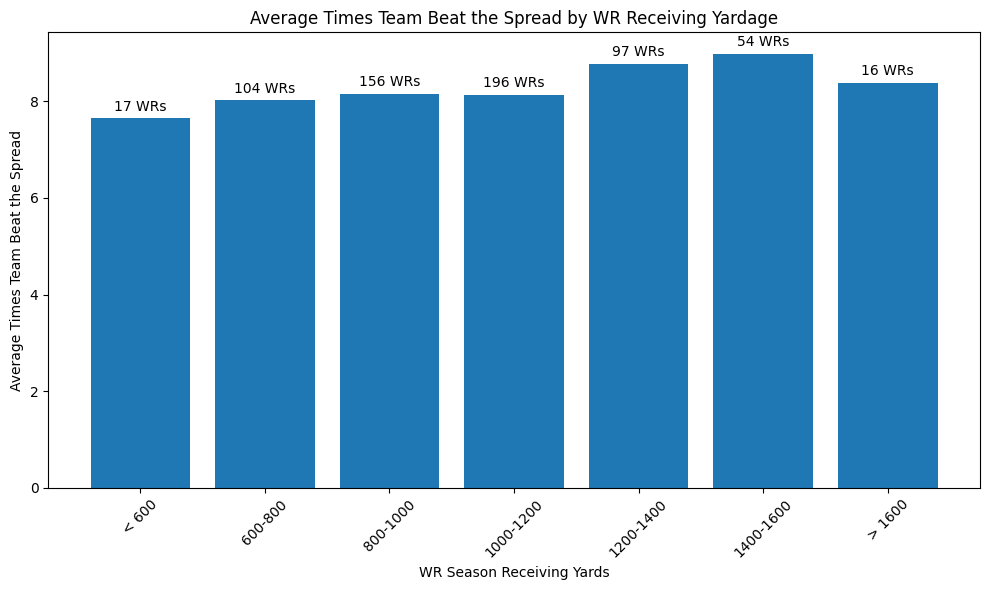

In [10]:
plt.figure(figsize=(10,6))
bars = plt.bar(bin_stats['YardsBin'], bin_stats['AvgCovers'])

plt.title("Average Times Team Beat the Spread by WR Receiving Yardage")
plt.xlabel("WR Season Receiving Yards")
plt.ylabel("Average Times Team Beat the Spread")
plt.xticks(rotation=45)
plt.tight_layout()
for bar, count in zip(bars, bin_stats['WRCount']):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,  # position above bar
        f'{int(count)} WRs',
        ha='center',
        va='bottom',
        fontsize=10
    )
plt.show()

<b>Find defensive player on each team with the most sacks:<b>

In [11]:
top_sack_players = clean_defense_df.loc[
    clean_defense_df.groupby(['Season', 'Team'])['Sk'].idxmax(), 
        ['Season', 'Team', 'Player', 'Sk']
].rename(columns={'Player': 'Sack_Player'})

bins = [0, 6, 8.5, 11, 14.5, 17, float('inf')]
bin_labels = ['< 6', '6-8.5', '8.5-11', '11-14.5', '14.5-17','> 17']
sack_stats = top_sack_players.groupby(['Sack_Player', 'Team', 'Season'])['Sk'].sum().reset_index()
merged_data = pd.merge(
    sack_stats,
    spreads[['Team', 'Season', 'cover']],
    on=['Team', 'Season'],
    how='inner'
)

merged_data['SacksBin'] = pd.cut(merged_data['Sk'], bins=bins, labels=bin_labels, right=False)

bin_stats = merged_data.groupby('SacksBin', observed=False).agg({'cover': 'mean','Sack_Player': 'count'  }).reset_index()

bin_stats.rename(columns={'cover': 'AvgCovers', 'Sack_Player': 'DEFCount'}, inplace=True)

<b>Graph:<b>

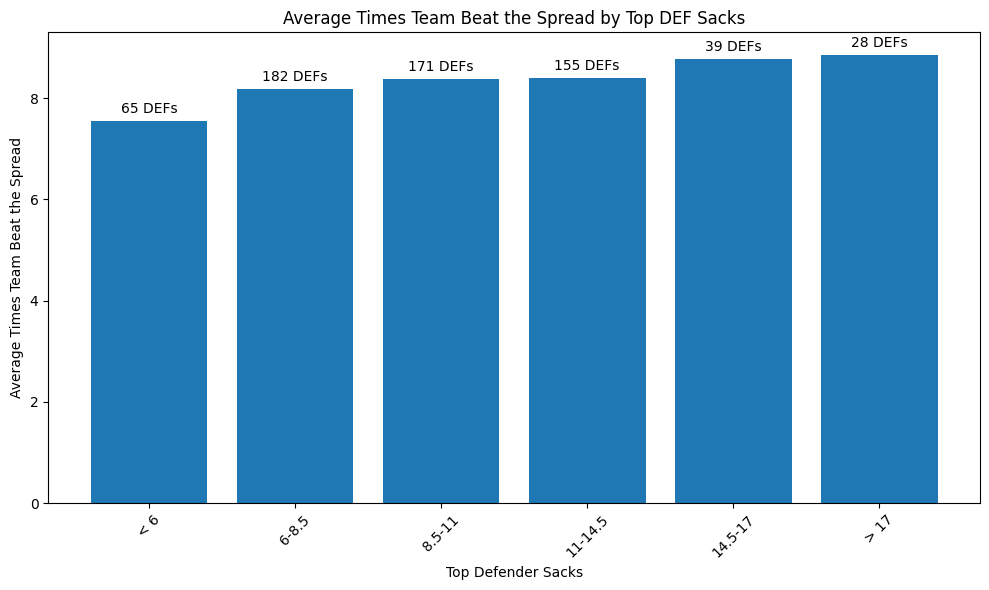

In [12]:
plt.figure(figsize=(10,6))
bars = plt.bar(bin_stats['SacksBin'], bin_stats['AvgCovers'])

plt.title("Average Times Team Beat the Spread by Top DEF Sacks")
plt.xlabel("Top Defender Sacks")
plt.ylabel("Average Times Team Beat the Spread")
plt.xticks(rotation=45)
plt.tight_layout()
for bar, count in zip(bars, bin_stats['DEFCount']):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,  # position above bar
        f'{int(count)} DEFs',
        ha='center',
        va='bottom',
        fontsize=10
    )
plt.show()

<b> Find player with the most interceptions on each team <b>

In [13]:
top_int_players = clean_defense_df.loc[
    clean_defense_df.groupby(['Season', 'Team'])['Int'].idxmax(), 
        ['Season', 'Team', 'Player', 'Int']
].rename(columns={'Player': 'Int_Player'})

bins = [0, 2, 4, 6, 8, float('inf')]
bin_labels = ['< 2', '2-4', '4-6', '6-8', '> 8']
int_stats = top_int_players.groupby(['Int_Player', 'Team', 'Season'])['Int'].sum().reset_index()
merged_data = pd.merge(
    int_stats,
    spreads[['Team', 'Season', 'cover']],
    on=['Team', 'Season'],
    how='inner'
)

merged_data['IntBin'] = pd.cut(merged_data['Int'], bins=bins, labels=bin_labels, right=False)

bin_stats = merged_data.groupby('IntBin', observed=False).agg({'cover': 'mean','Int_Player': 'count'  }).reset_index()

bin_stats.rename(columns={'cover': 'AvgCovers', 'Int_Player': 'DEFCount'}, inplace=True)

<b> Graph <b>

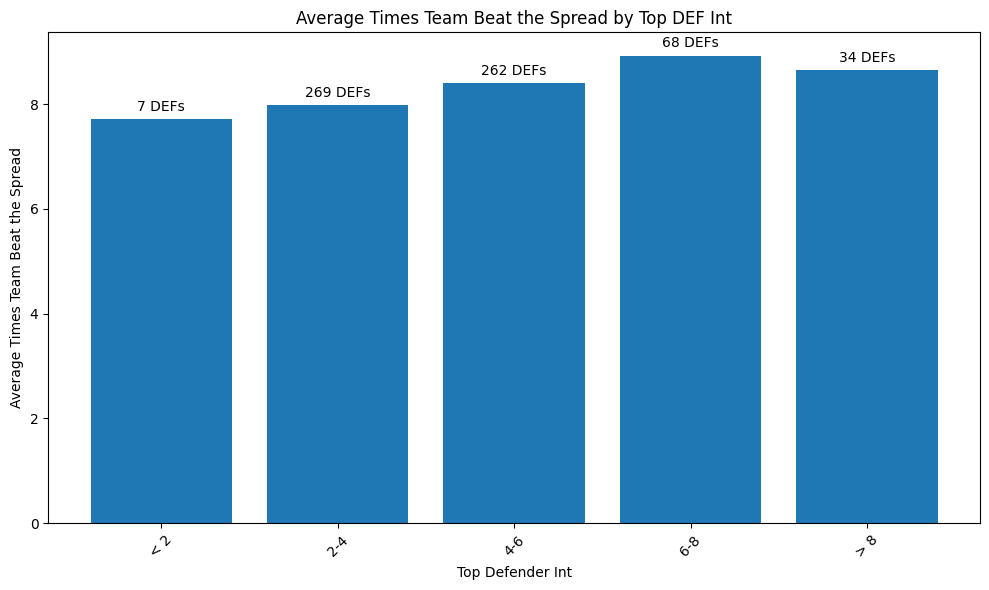

In [14]:
plt.figure(figsize=(10,6))
bars = plt.bar(bin_stats['IntBin'], bin_stats['AvgCovers'])

plt.title("Average Times Team Beat the Spread by Top DEF Int")
plt.xlabel("Top Defender Int")
plt.ylabel("Average Times Team Beat the Spread")
plt.xticks(rotation=45)
plt.tight_layout()
for bar, count in zip(bars, bin_stats['DEFCount']):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,  # position above bar
        f'{int(count)} DEFs',
        ha='center',
        va='bottom',
        fontsize=10
    )
plt.show()

In [18]:
games = pd.read_csv('spreadspoke_scores_updated.csv')
games = games[games['Season'] >= 2005]
games.head()

,schedule_date,Season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,Team,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
8673,9/8/2005,2005,1,False,NE,30,20,OAK,NE,-7.5,50,Gillette Stadium,False,71.0,9.0,64.0,NaN
8674,9/11/2005,2005,1,False,BAL,7,24,IND,IND,-3.0,47,M&T Bank Stadium,False,69.0,4.0,63.0,NaN
8675,9/11/2005,2005,1,False,BUF,22,7,HOU,BUF,-4.5,39,Ralph Wilson Stadium,False,64.0,8.0,58.0,NaN
8676,9/11/2005,2005,1,False,CAR,20,23,NO,CAR,-6.5,45.5,Bank of America Stadium,False,74.0,12.0,49.0,NaN
8677,9/11/2005,2005,1,False,CLE,13,27,CIN,CIN,-3.5,44.5,FirstEnergy Stadium,False,69.0,6.0,63.0,NaN


<b> Feature Engineering: <b>

In [15]:
# Start merging team-level stats into the spreads DataFrame
merged = spreads.copy()

merged = pd.merge(merged, wins_df, on=['Team', 'Season'], how='left')
merged = pd.merge(merged, qb_stats, on=['Team', 'Season'], how='left')
merged = pd.merge(merged, rb_stats, on=['Team', 'Season'], how='left')
merged = pd.merge(merged, wr_stats, on=['Team', 'Season'], how='left')
merged = pd.merge(merged, sack_stats, on=['Team', 'Season'], how='left')
merged = pd.merge(merged, int_stats, on=['Team', 'Season'], how='left')
merged.to_csv("eee.csv")
